In [1]:
import numpy as np
from numpy.lib import recfunctions as rfn
import matplotlib.pyplot as plt
from numba import njit
from tqdm.notebook import tqdm
import h5py as h5

import importlib
import GFM
from pygsl import spline
import warnings

In [186]:
from sys import platform
if platform == 'darwin':
    basepath = '/Users/abeane/Projects/nft/'
else:
    pass

yieldpath = basepath + '/tables/Arepo_GFM_Tables_TNG/Yields/'

In [51]:
importlib.reload(GFM)
importlib.reload(GFM.util)
param = GFM.TNGParameters()
IMF = GFM.ChabrierIMF(param)
LT = GFM.LifeTimes(yieldpath, param)

# SNII = GFM.yieldSNII_AGB(yieldpath, param, IMF, SNII=True)
# AGB = GFM.yieldSNII_AGB(yieldpath, param, IMF, AGB=True)
# SNIa = GFM.yieldSNIa(yieldpath, param)
gfm = GFM.GFM(yieldpath, param)

In [52]:
gfm.get_total_mass_ejected(0.01, 0.005, 0.0127)

(0.021424748612776223, 0.0022612173985372868)

In [42]:
importlib.reload(GFM)
importlib.reload(GFM.util)
x = np.vstack((np.linspace(0, 10, 5), np.linspace(1, 11, 5)))
y = np.full(x.shape, 2.0)
# x0 = np.array([0.2, 5.2, -0.5, 11])
xmin = np.array([0.2, 5.2])
xmax = np.array([8., 7.])
print('x =', x)
print('y =', y)
print('xmin =', xmin)
print('xmax =', xmax)

result = GFM.util.trap_integrate(x, y, xmin, xmax, 2.5)

print(result)




x = [[ 0.   2.5  5.   7.5 10. ]
 [ 1.   3.5  6.   8.5 11. ]]
y = [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
xmin = [0.2 5.2]
xmax = [8. 7.]
[15.6  3.6]


In [178]:
importlib.reload(GFM)
gfm = GFM.GFM(yieldpath, param)

# frac = np.linspace(0, 0.2, 4)
# z = np.full(frac.shape, 0.0127)

frac = 0
z = 0.03

frac = 0.001
df = 0.01 * frac
z = 0.01583419

tau = gfm.get_time_of_frac(frac-df/2., z)
print(tau)
print('call with frac time')
mej, met = gfm.get_total_mass_ejected(0, tau, z)
# print(mej)
print(mej, met, met/mej)
# gfm.get_total_mass_ejected_at_frac(0.01, 0.051, 0.0127)

print('call on frac')
mej, met = gfm.get_total_mass_ejected_at_frac(frac-df/2., frac+df/2., z)
print(mej, met, met/mej)

print('call on time')
mej, met = gfm.get_total_mass_ejected(tau, 4.9e-8, z)
print(mej, met, met/mej)

# gfm._z_bins[7]

# print(gfm._cum_eject[6])
# print(gfm._z_bins[6])
# print(gfm._logtau_bins)

# print(np.min(gfm._cum_eject))

100%|██████████| 1/1 [00:00<00:00, 42.66it/s]


0.0034420701054220905
call with frac time
0.0009949999589881793 0.00019735560716066012 0.19834735205552378
call on frac


100%|██████████| 1/1 [00:00<00:00, 37.16it/s]

1.0000023809820178e-05 1.9728397292967953e-06 0.197283503201206
call on time
1.2998768424959394e-06 2.564442572176504e-07 0.1972835032011515


In [180]:
gfm.get_tracer_metallicity(0.1, 0.0127)

array([[0.11894957]])

In [ ]:
arr = np.array([1, 2, 3])

val = 'arr'

In [184]:
a = np.array([1, 2, 3])
b = np.array([1., 2., 3.])
c = np.array(['a', 'b', 'c'])
arrays = {'a': a, 'b': b, 'c': c}

dtypes = {'names': list(arrays.keys()),
          'formats': ([arrays[key].dtype for key in arrays.keys()])}

tot = np.array(arrays, dtype=dtypes)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'dict'

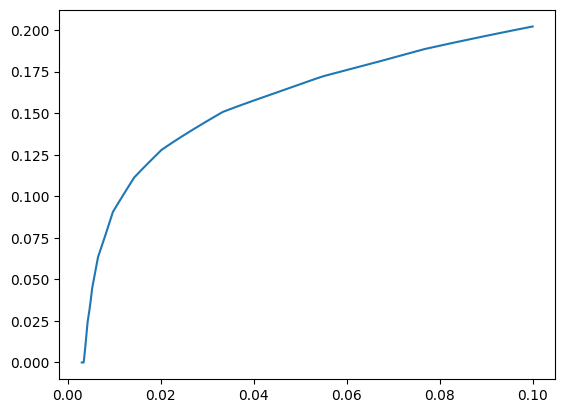

In [144]:
tau = np.linspace(0.003, 0.1, 1000)
tau0 = np.full_like(tau, 1e-12)
z = np.full(tau.shape, 0.0127)
mej, met = gfm.get_total_mass_ejected(tau0, tau, z)

plt.plot(tau, mej)

In [63]:
np.clip(1e99, 10, None)

1e+99

In [38]:
import numpy as np

# Example function
def func(a, b):
    return a + b  # Replace with your actual function

# Example arrays A and B
A = np.array([1, 2, 3])
B = np.array([44, 12, 17])

# Create mesh grids for A and B
Amesh, Bmesh = np.meshgrid(A, B, indexing='ij')

# Flatten the mesh grids to obtain 1D arrays
Amesh_flat = Amesh.flatten()
Bmesh_flat = Bmesh.flatten()

# Apply the function to obtain Cmesh
Cmesh = func(Amesh_flat, Bmesh_flat)

# Reshape Cmesh into C with shape (len(A), len(B))
C = Cmesh.reshape(len(A), len(B))

# Print the results
print("Amesh:")
print(Amesh)
print("\nBmesh:")
print(Bmesh)
print("\nC:")
print(C)

print(A[1]+B[2], C[1,2])


Amesh:
[[1 1 1]
 [2 2 2]
 [3 3 3]]

Bmesh:
[[44 12 17]
 [44 12 17]
 [44 12 17]]

C:
[[45 13 18]
 [46 14 19]
 [47 15 20]]
19 19


In [187]:
gfm_test = np.genfromtxt(basepath + 'iso/runs/dev/lvl6-MCnft/output-test/stellar_evolution_3.dat')

/var/folders/6p/hll0pcr53rx1zjv426_y3zyr0000gn/T/ipykernel_22113/3289013275.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(age_in_Gyr, tot_metal/tot_metal_from_metals)


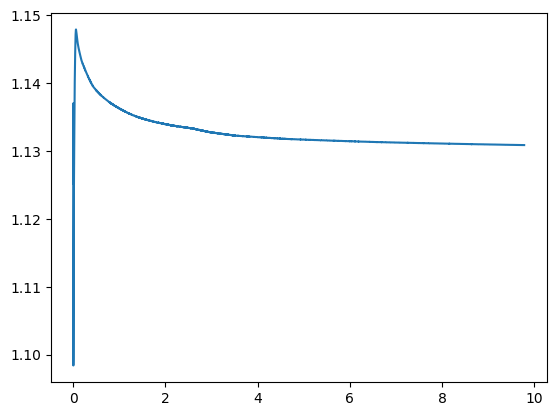

In [193]:
age_in_Gyr = gfm_test[:,0]
tot_metal = gfm_test[:,3]
metals = gfm_test[:,6:]
tot_metal_from_metals = np.sum(metals, axis=1)

# plt.plot(age_in_Gyr, tot_metal)
# plt.plot(age_in_Gyr, tot_metal_from_metals)
plt.plot(age_in_Gyr, tot_metal/tot_metal_from_metals)

In [195]:
importlib.reload(GFM)
importlib.reload(GFM.util)
param = GFM.TNGParameters()
IMF = GFM.ChabrierIMF(param)
LT = GFM.LifeTimes(yieldpath, param)

SNII = GFM.yieldSNII_AGB(yieldpath, param, IMF, SNII=True)
# AGB = GFM.yieldSNII_AGB(yieldpath, param, IMF, AGB=True)
# SNIa = GFM.yieldSNIa(yieldpath, param)
# gfm = GFM.GFM(yieldpath, param)

In [238]:
data = h5.File(yieldpath + 'SNII.hdf5', mode='r')
data['Yields']['Z_0.004']['Yield'][3]

array([0.00538209, 0.00613783, 0.00818757, 0.00584478, 0.00891745,
       0.0612704 , 0.01276346, 0.02327336, 0.0125585 , 0.01655388,
       0.05249057, 0.09673889, 0.18132713], dtype=float32)

In [249]:
# print(np.sum(data['Yields']['Z_0.004']['Yield'][2:], axis=0))
print(np.sum(data['Yields']['Z_0.004']['Yield'][2:,10]))
# print(np.sum(data['Yields']['Z_0.004']['Yield'], axis=0)) # equals 0
print(data['Yields']['Z_0.004']['Total_Metals'][10])
print(0.004 * data['Yields']['Z_0.004']['Ejected_mass'][10] + data['Yields']['Z_0.004']['Total_Metals'][10])

5.3476934
5.482602
5.608000709533691


In [247]:
# data['Yields']['Z_0.004']['Total_Metals'].shape
data['Yields']['Z_0.004']['Ejected_mass'][10]

31.349648

In [246]:
data['Yields']['Z_0.004'].keys()

<KeysViewHDF5 ['Ejected_mass', 'Total_Metals', 'Yield']>